# Calculation of the Higgs cross section
The Higgs production cross section at LHC will be caluclated
The dominant production mechanism is the gg fusion:
![gg2H](https://upload.wikimedia.org/wikipedia/commons/0/0e/Higgs-gluon-fusion.svg)  
First let's import libraries which  are needed

In [1]:
from  ROOT import TH1D, TCanvas, gRandom
from  math import exp, log, sqrt, pi
import  lhapdf

Welcome to JupyROOT 6.12/07


Define the cross section formula for g+g -> H, the Breit Wiegner formula taken from  [pdgReview](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-cross-section-formulae.pdf). The branching ratio for H -> gg taken from [twiki](https://twiki.cern.ch/twiki/bin/view/LHCPhysics/HiggsEuropeanStrategy2012#SM_Higgs_production_cross_se_AN2). Notice that the total decay width and the branching ratio to gluons are the most precise results available, calculated at least at NNLO.

In [2]:
mH   = 125      #Higgs mass
def sigma(shat):
    ge2mb = 0.389379 #from natural units to mb
    Bin = 0.0857     #The H->gg  BR (production mode)
#   Bin = 0.0630585  #The H->gg  BR (production mode)
    Bout = 1         #The H->any BR
    w    = 0.00407   #Higgs total decay width
#   w    = 0.00374   #Higgs total decay width
    Ncg  = 8         #Number of colors for gluon
    Nsg  = 2         #Number of spin projections for gluon

    E = sqrt(shat)  
    bw  = 1./Ncg**2 * 1./Nsg**2 *  16*pi/shat *  w**2/4/( (E-mH)**2 + w**2/4) * Bin * Bout
    bw *= 2   #magic factor due to identical gluons

    return bw * ge2mb

Define PDF to be used

In [3]:
name = "MRST2007lomod"	
name = "MRST2004qed_proton"	
pdf = lhapdf.getPDFSet(name).mkPDF(0)

LHAPDF 6.2.1 loading /lhapdf/install/share/LHAPDF/MRST2004qed_proton/MRST2004qed_proton_0000.dat
MRST2004qed_proton PDF set, member #0, version 3; LHAPDF ID = 20463


Define histograms to be filed, `dmH` half of the generated mass widht, `dy` is half of the rapidity interval of the interest

In [4]:
dmH = 0.100
dy = 5
hEta  = TH1D("eta", "Eta of H", 20, -dy, dy)
hMass = TH1D("mass", "Mass of H", 61, mH-dmH, mH+dmH)

Define the beam energy of the protons

In [5]:
Eb = 6500

Define the number of points to be generated

In [6]:
npoints = 1200000

Generate npoints of "events"

In [7]:
lnM2min = log((mH-dmH)**2)
lnM2max = log((mH+dmH)**2)
yMin = -dy
yMax = +dy

In [8]:
s1 = s2 = 0
for n in range(npoints):
    #Linear sampling in lnM2 and rapidiyt y
    lnM2 = lnM2min + (lnM2max - lnM2min)*gRandom.Uniform()
    y    = yMin    + (yMax    -    yMin)*gRandom.Uniform()
    m = exp(0.5*lnM2)

    #Get x1 and x2
    x1 = m/(2*Eb) * exp(+y)
    x2 = m/(2*Eb) * exp(-y)

    #if outside of the physical phase space
    if x1 > 1 or x2 > 1:
        continue

    #Weight from linear sampling
    wgt = (lnM2max - lnM2min)*(yMax - yMin)
    
    #gluon PDF
    def g(x):
        return pdf.xfxQ(0, x, m)

    #Convolution of PDFs and x-section
    res = g(x1)*g(x2)*sigma(m*m)
    f = res * wgt

    #fill histograms
    hMass.Fill(m,  f)
    hEta.Fill(y, f)
    s1 += f
    s2 += f**2

Divide by npoints

In [9]:
avg  = s1/npoints
avg2 = s2/npoints

Calculate the error

In [10]:
sigma2 = avg2 - avg**2
err = sqrt(sigma2/npoints)

Print the x-section

In [11]:
print 'Cross section for pp -> H is ', avg, '+-', err, 'mb'

Cross section for pp -> H is  2.36312027152e-08 +- 1.12645737668e-10 mb


Plot histograms

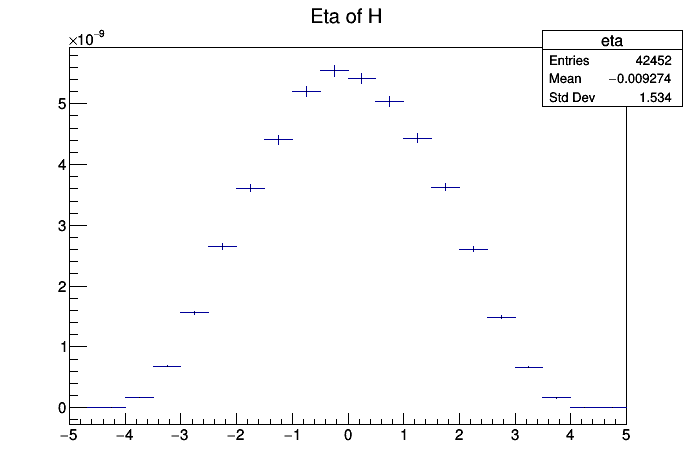

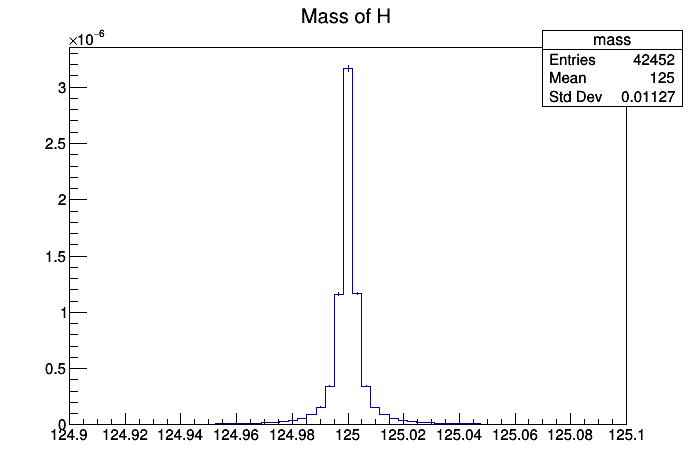

In [12]:
c = TCanvas()
hEta.Scale(1./npoints, "width")
hEta.Draw()
c.Draw()
d = TCanvas()
hMass.Scale(1./npoints, "width")
hMass.Draw("hist e")
d.Draw()